In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.spatial.distance as spd
import scipy.cluster.hierarchy as sph
import sklearn as sk
import sklearn.metrics as skm
import sklearn.cluster as skc
import sklearn.decomposition as skd
import sklearn.mixture as skmix
%matplotlib inline

In [2]:
df = pd.read_csv('requests_export000.tsv', delimiter = '\t')

In [3]:
df.head(5)
print(len(df))

15566499


In [4]:
df = df.dropna()

In [5]:
df_reduced = df.sample(20000)

In [6]:
df_reduced.head()

,/courses/166/files/569/preview,"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.78.2 (KHTML, like Gecko) Version/7.0.6 Safari/537.78.2",89346,013ee67cd2f2a42eb788b1061ed14155,2015-10-07 03:34:09,05d0532840f04928dfdd86296c51189d
12313157,/courses/166/assignments/202/submissions/1790,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,616383,0a0b89665c5a39665822b1e1618d3574,2014-11-03 04:22:18,05d0532840f04928dfdd86296c51189d
10830117,/api/v1/courses/166/pages/home-page/revisions/...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5)...,125103,49140b64b42a8c1c34a09652841bec8c,2014-10-13 22:56:12,05d0532840f04928dfdd86296c51189d
11771584,/api/v1/courses/166/pages/home-page/revisions/...,Mozilla/5.0 (Windows NT 6.3; WOW64; Trident/7....,98732,6ca4cf4ef2bf78871c0c23bd1a558230,2014-10-26 18:02:50,05d0532840f04928dfdd86296c51189d
5363414,/api/v1/courses/166/pages/formula-card/revisio...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,115977,047cf99ee8e9632d9cb599456f18969c,2014-11-12 17:41:30,05d0532840f04928dfdd86296c51189d
513918,/api/v1/courses/166/pages/home-page/revisions/...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,252877,3fbce66959b779a43eb31581b917356e,2014-09-10 01:48:27,05d0532840f04928dfdd86296c51189d


In [7]:
new_header = ['URL', 'User Agent', 'Unknown', 'UUID', 'TimeStamp', 'ClassID']
df_reduced.columns = new_header

In [8]:
df_reduced.head()

,URL,User Agent,Unknown,UUID,TimeStamp,ClassID
12313157,/courses/166/assignments/202/submissions/1790,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,616383,0a0b89665c5a39665822b1e1618d3574,2014-11-03 04:22:18,05d0532840f04928dfdd86296c51189d
10830117,/api/v1/courses/166/pages/home-page/revisions/...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5)...,125103,49140b64b42a8c1c34a09652841bec8c,2014-10-13 22:56:12,05d0532840f04928dfdd86296c51189d
11771584,/api/v1/courses/166/pages/home-page/revisions/...,Mozilla/5.0 (Windows NT 6.3; WOW64; Trident/7....,98732,6ca4cf4ef2bf78871c0c23bd1a558230,2014-10-26 18:02:50,05d0532840f04928dfdd86296c51189d
5363414,/api/v1/courses/166/pages/formula-card/revisio...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,115977,047cf99ee8e9632d9cb599456f18969c,2014-11-12 17:41:30,05d0532840f04928dfdd86296c51189d
513918,/api/v1/courses/166/pages/home-page/revisions/...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,252877,3fbce66959b779a43eb31581b917356e,2014-09-10 01:48:27,05d0532840f04928dfdd86296c51189d


In [9]:
del df_reduced['Unknown']

In [10]:
df_reduced.head()

,URL,User Agent,UUID,TimeStamp,ClassID
12313157,/courses/166/assignments/202/submissions/1790,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,0a0b89665c5a39665822b1e1618d3574,2014-11-03 04:22:18,05d0532840f04928dfdd86296c51189d
10830117,/api/v1/courses/166/pages/home-page/revisions/...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5)...,49140b64b42a8c1c34a09652841bec8c,2014-10-13 22:56:12,05d0532840f04928dfdd86296c51189d
11771584,/api/v1/courses/166/pages/home-page/revisions/...,Mozilla/5.0 (Windows NT 6.3; WOW64; Trident/7....,6ca4cf4ef2bf78871c0c23bd1a558230,2014-10-26 18:02:50,05d0532840f04928dfdd86296c51189d
5363414,/api/v1/courses/166/pages/formula-card/revisio...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,047cf99ee8e9632d9cb599456f18969c,2014-11-12 17:41:30,05d0532840f04928dfdd86296c51189d
513918,/api/v1/courses/166/pages/home-page/revisions/...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,3fbce66959b779a43eb31581b917356e,2014-09-10 01:48:27,05d0532840f04928dfdd86296c51189d


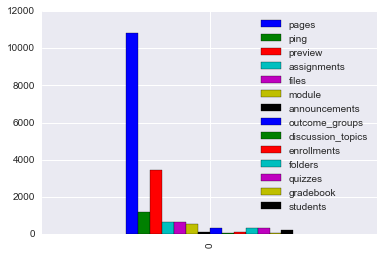

In [11]:
#####OVERALL Analysis
df_pages = pd.DataFrame()
df_pages['Views'] = df_reduced['URL'].value_counts()

df_pages

df_pageTypeCount = pd.DataFrame([[0,0,0,0,0,0,0,0,0,0,0,0,0,0]], columns = ['pages', 'ping', 
                                                       'preview', 'assignments',
                                                       'files', 'module', 'announcements',
                                                           'outcome_groups', 'discussion_topics', 
                                                           'enrollments', 'folders', 'quizzes',
                                                                    'gradebook', 'students'])
for index, row in df_pages.iterrows():
    if index.find('pages') != -1:
        df_pageTypeCount['pages'] += row.values[0]
    elif index.find('ping') != -1:
        df_pageTypeCount['ping'] += row.values[0]
    elif index.find('preview') != -1:
        df_pageTypeCount['preview'] += row.values[0]
    elif index.find('assignments') != -1:
        df_pageTypeCount['assignments'] += row.values[0]
    elif index.find('files') != -1:
        df_pageTypeCount['files'] += row.values[0]
    elif index.find('module') != -1:
        df_pageTypeCount['module'] += row.values[0]
    elif index.find('announcements') != -1:
        df_pageTypeCount['announcements'] += row.values[0]    
    elif index.find('outcome_groups') != -1:
        df_pageTypeCount['outcome_groups'] += row.values[0] 
    elif index.find('discussion_topics') != -1:
        df_pageTypeCount['discussion_topics'] += row.values[0] 
    elif index.find('enrollments') != -1:
        df_pageTypeCount['enrollments'] += row.values[0] 
    elif index.find('folders') != -1:
        df_pageTypeCount['folders'] += row.values[0]    
    elif index.find('quizzes') != -1:
        df_pageTypeCount['quizzes'] += row.values[0] 
    elif index.find('gradebook') != -1:
        df_pageTypeCount['gradebook'] += row.values[0] 
    elif index.find('students') != -1:
        df_pageTypeCount['students'] += row.values[0] 

#only 953 results - this is the wrong way to do it; gotta make it scalable and automatically 
#create columns based on new pages
df_pageTypeCount.plot(kind='bar')

In [12]:
#cluster
# the links below for URLs 1 thru 9 are the three most clicked links for each course, based on the sorting code that Connie did. 

dfnew = df_reduced

dfnew['URL1'] = np.where(dfnew['URL']=='/api/v1/courses/166/ping', 1, 0)
dfnew['URL2'] = np.where(dfnew['URL']=='/api/v1/courses/166/pages/virtual-sites/revisions/latest?summary=true', 1, 0)
dfnew['URL3'] = np.where(dfnew['URL']=='/api/v1/courses/166/pages/dr-millers-lecture-003-recordings/revisions/latest?summary=true', 1, 0)

dfnew['URL4'] = np.where(dfnew['URL']=='/api/v1/courses/158/pages/sketching-videos/revisions/latest?summary=true', 1, 0)
dfnew['URL5'] = np.where(dfnew['URL']=='/api/v1/courses/158/ping', 1, 0)
dfnew['URL6'] = np.where(dfnew['URL']=='/courses/158', 1, 0)

dfnew['URL7'] = np.where(dfnew['URL']=='/api/v1/courses/164/pages/blogging/revisions/latest?summary=true', 1, 0)
dfnew['URL8'] = np.where(dfnew['URL']=='/api/v1/courses/164/ping', 1, 0)
dfnew['URL9'] = np.where(dfnew['URL']=='/courses/164/', 1, 0)


dfnew['ClassID1'] = np.where(dfnew['ClassID']=='05d0532840f04928dfdd86296c51189d', 1, 0)
dfnew['ClassID2'] = np.where(dfnew['ClassID']=='08acd1cae6c97712fc8dbe400c35b47d', 1, 0)
dfnew['ClassID3'] = np.where(dfnew['ClassID']=='a6ff862f8df9f99bec63a4096890db10', 1, 0)

dfnew = dfnew.drop('URL', 1)
dfnew = dfnew.drop('ClassID', 1)
dfnew.head() 

,User Agent,UUID,TimeStamp,URL1,URL2,URL3,URL4,URL5,URL6,URL7,URL8,URL9,ClassID1,ClassID2,ClassID3
12313157,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,0a0b89665c5a39665822b1e1618d3574,2014-11-03 04:22:18,0,0,0,0,0,0,0,0,0,1,0,0
10830117,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5)...,49140b64b42a8c1c34a09652841bec8c,2014-10-13 22:56:12,0,0,0,0,0,0,0,0,0,1,0,0
11771584,Mozilla/5.0 (Windows NT 6.3; WOW64; Trident/7....,6ca4cf4ef2bf78871c0c23bd1a558230,2014-10-26 18:02:50,0,0,0,0,0,0,0,0,0,1,0,0
5363414,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,047cf99ee8e9632d9cb599456f18969c,2014-11-12 17:41:30,0,0,0,0,0,0,0,0,0,1,0,0
513918,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,3fbce66959b779a43eb31581b917356e,2014-09-10 01:48:27,0,0,0,0,0,0,0,0,0,1,0,0


In [13]:
#Normalize the data. (When working with a smaller subset of the data, there were NAN columns that need to be removed if you want to see the clustering
#analysis) 
df_filtered = dfnew[['URL1', 'URL2', 'URL3', 'URL4', 'URL5', 'URL6', 'URL7', 'URL8','URL9', 'ClassID1','ClassID2','ClassID3',]]
df_norm = df_filtered.apply(lambda x: (x - x.mean()) / x.std())
df_norm.head()

,URL1,URL2,URL3,URL4,URL5,URL6,URL7,URL8,URL9,ClassID1,ClassID2,ClassID3
12313157,-0.231695,-0.163862,-0.159631,-0.085158,-0.064553,-0.0394,-0.089233,-0.075378,-0.01,0.397748,-0.2572,-0.283816
10830117,-0.231695,-0.163862,-0.159631,-0.085158,-0.064553,-0.0394,-0.089233,-0.075378,-0.01,0.397748,-0.2572,-0.283816
11771584,-0.231695,-0.163862,-0.159631,-0.085158,-0.064553,-0.0394,-0.089233,-0.075378,-0.01,0.397748,-0.2572,-0.283816
5363414,-0.231695,-0.163862,-0.159631,-0.085158,-0.064553,-0.0394,-0.089233,-0.075378,-0.01,0.397748,-0.2572,-0.283816
513918,-0.231695,-0.163862,-0.159631,-0.085158,-0.064553,-0.0394,-0.089233,-0.075378,-0.01,0.397748,-0.2572,-0.283816


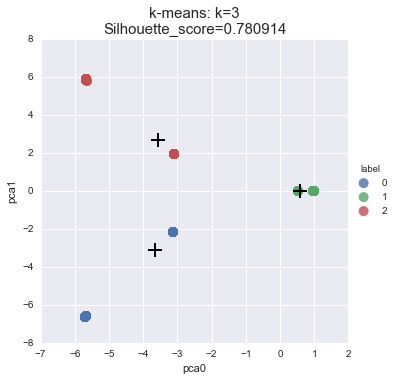

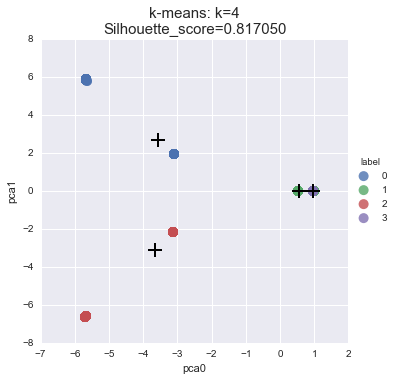

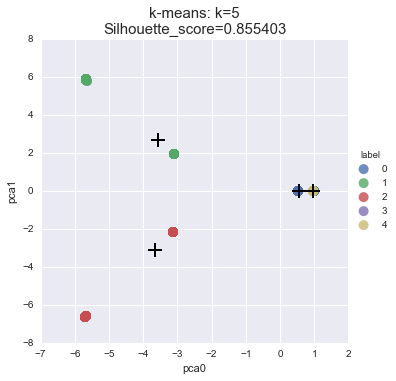

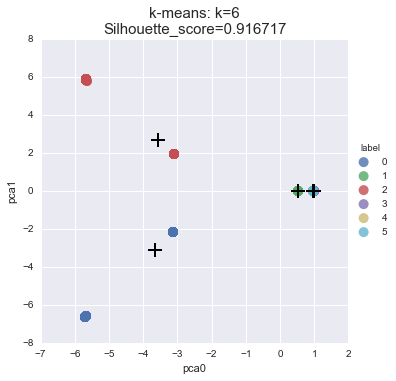

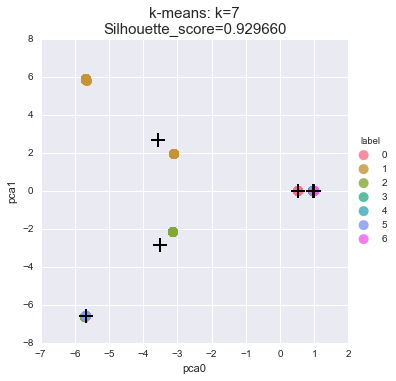

In [58]:
#kmeans clustering visualization

pca_model = skd.PCA(n_components=2).fit(df_norm)
pca_data = pca_model.transform(df_norm)
df_pca = pd.DataFrame(pca_data, columns=['pca0', 'pca1'])

for k in range(3,8):
    kmeans_model = skc.KMeans(k).fit(df_norm)
    centroids = kmeans_model.cluster_centers_
    centroids_pca = pca_model.transform(centroids)
    cluster_labels = kmeans_model.labels_
    df_pca['label'] = cluster_labels
    silh_score = skm.silhouette_score(df_norm, cluster_labels)
    
    plt.figure()
    f = sns.lmplot(x='pca0', y='pca1', data=df_pca, 
                   hue='label', fit_reg=False, 
                   scatter_kws={'s': 100})
    f.ax.scatter(centroids_pca[:,0], centroids_pca[:,1], 
                 marker='+', s=200, linewidths=2, color='black')
    plt.title('k-means: k=%d\nSilhouette_score=%f'%(
                k, silh_score), fontsize=15)

In [60]:
max_label_id = np.max(kmeans_model.labels_)
print('There are %d clusters'%max_label_id)
for i in range(1, max_label_id + 1):
    members = df_norm.index[cluster_labels == i]
    if i == 1:
        cluster1 = members
    elif i == 2:
        cluster2 = members
    elif i == 3:
        cluster3 = members
    elif i == 4:
        cluster4 = members
    elif i == 5:
        cluster5 = members
    elif i == 6:
        cluster6 = members
print(len(cluster6))

There are 6 clusters
1019


In [16]:
#######CLUSTER 1 ANALYSIS
df_cluster1 = pd.DataFrame(columns=('URL', 'User Agent', 'TimeStamp', 'UUID', 'ClassID'))
for member in cluster1:
    df_cluster1.loc[len(df_cluster1)] = df_reduced.ix[member]
df_cluster1.head()

,URL,User Agent,TimeStamp,UUID,ClassID
0,/api/v1/courses/158/pages/me250-home-page/revi...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,2014-10-30 03:55:55,418127ed04ba38547760fc1ca1c4e357,08acd1cae6c97712fc8dbe400c35b47d
1,/courses/158/files/19241/download?wrap=1,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,2014-11-10 03:36:33,1723707a0cc40e59a890886b2c35243a,08acd1cae6c97712fc8dbe400c35b47d
2,/courses/158/folders/698?page_view_id=2e5d2790...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,2014-09-24 13:47:09,0f93be7ffd5e3a1ea25f82f0effde4ba,08acd1cae6c97712fc8dbe400c35b47d
3,/api/v1/courses/158/pages/me250-home-page/revi...,Mozilla/5.0 (Windows NT 6.3; WOW64; Trident/7....,2014-09-04 21:23:00,0bdf7a693d6d3ebbc19d6a5ed0ad9e89,08acd1cae6c97712fc8dbe400c35b47d
4,/courses/158/assignments/1956,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5)...,2014-12-13 22:16:13,ec97977dde7ef43cf030267efc0fe019,08acd1cae6c97712fc8dbe400c35b47d


/Users/andycho/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


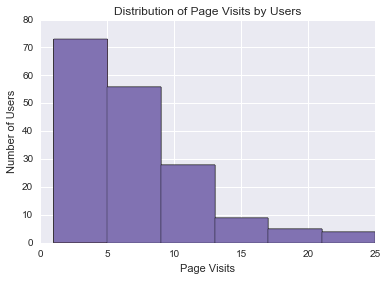

In [17]:
#Descriptive Stats
df_cluster1.groupby('UUID').count().sort(['URL']).plot(kind='hist', bins=6, legend=False,
                                                    title = 'Distribution of Page Visits by Users')
plt.xlabel('Page Visits')
plt.ylabel('Number of Users')

In [18]:
df_cluster1.groupby('UUID').count().mean()['URL'] #average number of page views for each student in this group

6.6171428571428574

In [19]:
#Time Series
df_cluster1['date'] = pd.to_datetime(df_cluster1['TimeStamp'])
df_cluster1.index = df_cluster1['date']
del df_cluster1['date']
del df_cluster1['TimeStamp']

In [20]:
df_cluster1 = df_cluster1.sort()
df_cluster1.head()

/Users/andycho/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  if __name__ == '__main__':


,URL,User Agent,UUID,ClassID
date,,,,
2014-08-20 18:09:50,/api/v1/courses/158/pages/me250-home-page/revi...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,d85bd79aba765954f4955c68990331f0,08acd1cae6c97712fc8dbe400c35b47d
2014-08-31 15:34:22,/courses/158/folders/708/download?page_view_id...,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,e8b0c7c0c0031144d53c22b9cd362fa0,08acd1cae6c97712fc8dbe400c35b47d
2014-08-31 21:45:57,/courses/158/files,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,d85bd79aba765954f4955c68990331f0,08acd1cae6c97712fc8dbe400c35b47d
2014-09-01 18:26:25,/courses/158/discussion_topics/129,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,46cb8e34e25c58503eb5bc1af4ff29be,08acd1cae6c97712fc8dbe400c35b47d
2014-09-01 19:42:25,/api/v1/courses/158/discussion_topics?only_ann...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,8d47a11f21ebf64c275a1381dc0238f2,08acd1cae6c97712fc8dbe400c35b47d


In [21]:
#bin them into days or something and then use the count to see how many are in a certain day or hour
df_cluster1['HofD'] = [r.hour for r in df_cluster1.index]
df_cluster1['DofM'] = [r.day for r in df_cluster1.index]
df_cluster1.head()

,URL,User Agent,UUID,ClassID,HofD,DofM
date,,,,,,
2014-08-20 18:09:50,/api/v1/courses/158/pages/me250-home-page/revi...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,d85bd79aba765954f4955c68990331f0,08acd1cae6c97712fc8dbe400c35b47d,18,20
2014-08-31 15:34:22,/courses/158/folders/708/download?page_view_id...,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,e8b0c7c0c0031144d53c22b9cd362fa0,08acd1cae6c97712fc8dbe400c35b47d,15,31
2014-08-31 21:45:57,/courses/158/files,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,d85bd79aba765954f4955c68990331f0,08acd1cae6c97712fc8dbe400c35b47d,21,31
2014-09-01 18:26:25,/courses/158/discussion_topics/129,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,46cb8e34e25c58503eb5bc1af4ff29be,08acd1cae6c97712fc8dbe400c35b47d,18,1
2014-09-01 19:42:25,/api/v1/courses/158/discussion_topics?only_ann...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,8d47a11f21ebf64c275a1381dc0238f2,08acd1cae6c97712fc8dbe400c35b47d,19,1


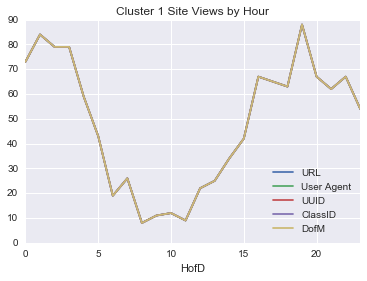

In [22]:
df_cluster1.groupby('HofD').count().plot(title='Cluster 1 Site Views by Hour')

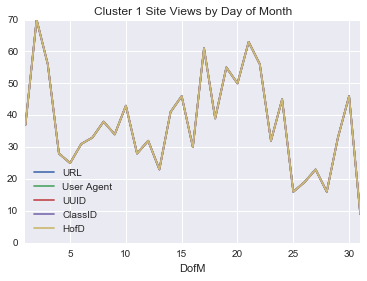

In [23]:
df_cluster1.groupby('DofM').count().plot(title='Cluster 1 Site Views by Day of Month')

In [24]:
#######CLUSTER 2 ANALYSIS
df_cluster2 = pd.DataFrame(columns=('URL', 'User Agent', 'TimeStamp', 'UUID', 'ClassID'))
for member in cluster2:
    df_cluster2.loc[len(df_cluster2)] = df_reduced.ix[member]
df_cluster2.head()

,URL,User Agent,TimeStamp,UUID,ClassID
0,/courses/164/enroll_users,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1...,2014-11-26 20:10:05,eb8eef99616f3825f89ac2c4e7fdc62a,a6ff862f8df9f99bec63a4096890db10
1,/courses/164/files/1387/preview?verifier=XTmZF...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_2)...,2014-09-01 21:59:50,944910f563a97827d0ad4b4c3c8cb2e8,a6ff862f8df9f99bec63a4096890db10
2,/api/v1/courses/164/pages/understanding-how-yo...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,2014-10-04 20:28:33,245f81ce9aaf6da728b8263551bb8673,a6ff862f8df9f99bec63a4096890db10
3,/api/v1/courses/164/pages/conventional-academi...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5)...,2014-11-28 19:07:32,f20e922d0772d76f2db6b1939874bfb5,a6ff862f8df9f99bec63a4096890db10
4,/api/v1/courses/164/users/2358?per_page=50,iCanvas/3.7.1 (151) Unknown iPad/iOS 8.1,2014-11-12 18:23:39,eb8eef99616f3825f89ac2c4e7fdc62a,a6ff862f8df9f99bec63a4096890db10


/Users/andycho/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


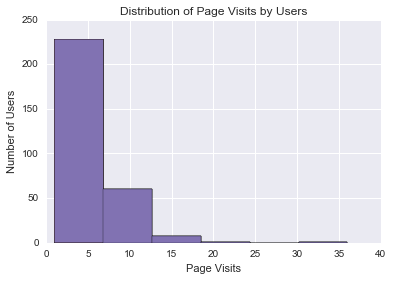

In [25]:
#Descriptive Stats
df_cluster2.groupby('UUID').count().sort(['URL']).plot(kind='hist', bins=6, legend=False,
                                                    title = 'Distribution of Page Visits by Users')
plt.xlabel('Page Visits')
plt.ylabel('Number of Users')

In [26]:
df_cluster2.groupby('UUID').count().mean()['URL'] #average number of page views for each student in this group

5.0033557046979862

In [27]:
#Time Series
df_cluster2['date'] = pd.to_datetime(df_cluster2['TimeStamp'])
df_cluster2.index = df_cluster2['date']
del df_cluster2['date']
del df_cluster2['TimeStamp']

In [28]:
df_cluster2 = df_cluster2.sort()
df_cluster2.head()

/Users/andycho/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  if __name__ == '__main__':


,URL,User Agent,UUID,ClassID
date,,,,
2014-08-12 11:15:02,/api/v1/courses/164/pages/blogging/revisions/l...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,eb8eef99616f3825f89ac2c4e7fdc62a,a6ff862f8df9f99bec63a4096890db10
2014-08-12 14:03:40,/api/v1/courses/164/pages/blogging/revisions/l...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,eb8eef99616f3825f89ac2c4e7fdc62a,a6ff862f8df9f99bec63a4096890db10
2014-08-12 14:09:43,/api/v1/courses/164/pages/blogging/revisions/l...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,eb8eef99616f3825f89ac2c4e7fdc62a,a6ff862f8df9f99bec63a4096890db10
2014-08-12 16:36:55,/api/v1/courses/164/pages/blogging/revisions/l...,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:30.0) G...,a03f588d12a08e752f3dd99b78693f0b,a6ff862f8df9f99bec63a4096890db10
2014-08-13 17:18:13,/api/v1/courses/164/pages/which-room-do-i-go-f...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,eb8eef99616f3825f89ac2c4e7fdc62a,a6ff862f8df9f99bec63a4096890db10


In [29]:
#bin them into days or something and then use the count to see how many are in a certain day or hour
df_cluster2['HofD'] = [r.hour for r in df_cluster2.index]
df_cluster2['DofM'] = [r.day for r in df_cluster2.index]
df_cluster2.head()

,URL,User Agent,UUID,ClassID,HofD,DofM
date,,,,,,
2014-08-12 11:15:02,/api/v1/courses/164/pages/blogging/revisions/l...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,eb8eef99616f3825f89ac2c4e7fdc62a,a6ff862f8df9f99bec63a4096890db10,11,12
2014-08-12 14:03:40,/api/v1/courses/164/pages/blogging/revisions/l...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,eb8eef99616f3825f89ac2c4e7fdc62a,a6ff862f8df9f99bec63a4096890db10,14,12
2014-08-12 14:09:43,/api/v1/courses/164/pages/blogging/revisions/l...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,eb8eef99616f3825f89ac2c4e7fdc62a,a6ff862f8df9f99bec63a4096890db10,14,12
2014-08-12 16:36:55,/api/v1/courses/164/pages/blogging/revisions/l...,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:30.0) G...,a03f588d12a08e752f3dd99b78693f0b,a6ff862f8df9f99bec63a4096890db10,16,12
2014-08-13 17:18:13,/api/v1/courses/164/pages/which-room-do-i-go-f...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,eb8eef99616f3825f89ac2c4e7fdc62a,a6ff862f8df9f99bec63a4096890db10,17,13


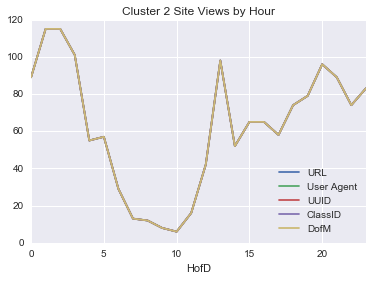

In [30]:
df_cluster2.groupby('HofD').count().plot(title='Cluster 2 Site Views by Hour')

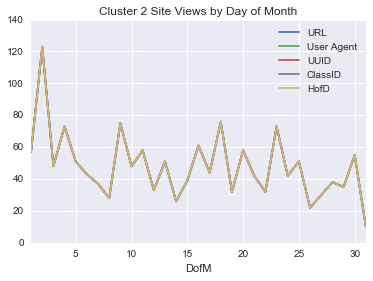

In [31]:
df_cluster2.groupby('DofM').count().plot(title='Cluster 2 Site Views by Day of Month')

In [32]:
#######CLUSTER 3 ANALYSIS
df_cluster3 = pd.DataFrame(columns=('URL', 'User Agent', 'TimeStamp', 'UUID', 'ClassID'))
for member in cluster3:
    df_cluster3.loc[len(df_cluster3)] = df_reduced.ix[member]
df_cluster3.head()

,URL,User Agent,TimeStamp,UUID,ClassID
0,/api/v1/courses/166/pages/dr-millers-lecture-0...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10) ...,2014-11-12 06:42:11,4a0f519783d5f61dc72e37bcc6d592bd,05d0532840f04928dfdd86296c51189d
1,/api/v1/courses/166/pages/dr-millers-lecture-0...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,2014-10-14 23:23:36,dd23ed92d549a669bfa6030dd1284016,05d0532840f04928dfdd86296c51189d
2,/api/v1/courses/166/pages/dr-millers-lecture-0...,Mozilla/5.0 (Windows NT 6.3; WOW64; Trident/7....,2014-11-10 20:48:14,c3256f39d40fab02e1cc916136ae9f41,05d0532840f04928dfdd86296c51189d
3,/api/v1/courses/166/pages/dr-millers-lecture-0...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10.9; r...,2014-10-14 03:34:13,74ea2d0aa5bed3de94ca9f00ef58dfd5,05d0532840f04928dfdd86296c51189d
4,/api/v1/courses/166/pages/dr-millers-lecture-0...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10) ...,2014-11-26 02:44:41,5608070be64fc3358498dd86aa8d316f,05d0532840f04928dfdd86296c51189d


/Users/andycho/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


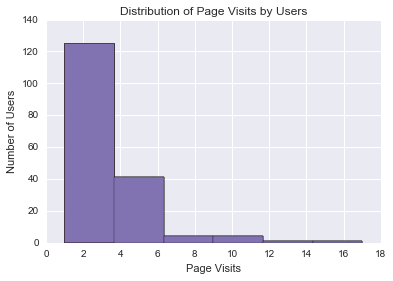

In [33]:
#Descriptive Stats
df_cluster3.groupby('UUID').count().sort(['URL']).plot(kind='hist', bins=6, legend=False,
                                                    title = 'Distribution of Page Visits by Users')
plt.xlabel('Page Visits')
plt.ylabel('Number of Users')

In [34]:
df_cluster3.groupby('UUID').count().mean()['URL'] #average number of page views for each student in this group

2.8238636363636362

In [35]:
#Time Series
df_cluster3['date'] = pd.to_datetime(df_cluster3['TimeStamp'])
df_cluster3.index = df_cluster3['date']
del df_cluster3['date']
del df_cluster3['TimeStamp']

In [36]:
df_cluster3 = df_cluster3.sort()
df_cluster3.head()

/Users/andycho/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  if __name__ == '__main__':


,URL,User Agent,UUID,ClassID
date,,,,
2014-09-05 15:20:22,/api/v1/courses/166/pages/dr-millers-lecture-0...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,12ad6efb91293b2eddb6f95c5c926028,05d0532840f04928dfdd86296c51189d
2014-09-05 15:50:21,/api/v1/courses/166/pages/dr-millers-lecture-0...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_4)...,7734162bdae803bec8e5fc999bad82dc,05d0532840f04928dfdd86296c51189d
2014-09-05 18:45:11,/api/v1/courses/166/pages/dr-millers-lecture-0...,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,ef7aa56d65f83625d673628e00f042e3,05d0532840f04928dfdd86296c51189d
2014-09-08 00:58:28,/api/v1/courses/166/pages/dr-millers-lecture-0...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,c399155d47f93f9e1d38c68fc86bfafe,05d0532840f04928dfdd86296c51189d
2014-09-08 15:22:08,/api/v1/courses/166/pages/dr-millers-lecture-0...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,122eef61d18b09a0fad9bf3a40c01aa8,05d0532840f04928dfdd86296c51189d


In [37]:
#bin them into days or something and then use the count to see how many are in a certain day or hour
df_cluster3['HofD'] = [r.hour for r in df_cluster3.index]
df_cluster3['DofM'] = [r.day for r in df_cluster3.index]
df_cluster3.head()

,URL,User Agent,UUID,ClassID,HofD,DofM
date,,,,,,
2014-09-05 15:20:22,/api/v1/courses/166/pages/dr-millers-lecture-0...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,12ad6efb91293b2eddb6f95c5c926028,05d0532840f04928dfdd86296c51189d,15,5
2014-09-05 15:50:21,/api/v1/courses/166/pages/dr-millers-lecture-0...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_4)...,7734162bdae803bec8e5fc999bad82dc,05d0532840f04928dfdd86296c51189d,15,5
2014-09-05 18:45:11,/api/v1/courses/166/pages/dr-millers-lecture-0...,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,ef7aa56d65f83625d673628e00f042e3,05d0532840f04928dfdd86296c51189d,18,5
2014-09-08 00:58:28,/api/v1/courses/166/pages/dr-millers-lecture-0...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,c399155d47f93f9e1d38c68fc86bfafe,05d0532840f04928dfdd86296c51189d,0,8
2014-09-08 15:22:08,/api/v1/courses/166/pages/dr-millers-lecture-0...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,122eef61d18b09a0fad9bf3a40c01aa8,05d0532840f04928dfdd86296c51189d,15,8


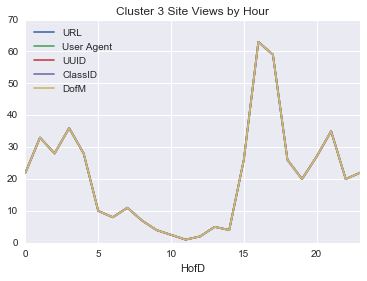

In [38]:
df_cluster3.groupby('HofD').count().plot(title='Cluster 3 Site Views by Hour')

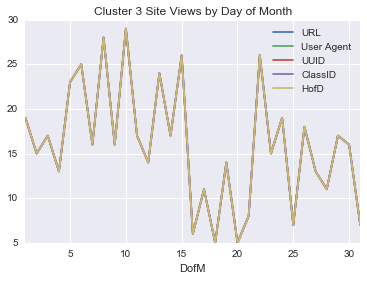

In [39]:
df_cluster3.groupby('DofM').count().plot(title='Cluster 3 Site Views by Day of Month')

In [40]:
#######CLUSTER 4 ANALYSIS
df_cluster4 = pd.DataFrame(columns=('URL', 'User Agent', 'TimeStamp', 'UUID', 'ClassID'))
for member in cluster4:
    df_cluster4.loc[len(df_cluster4)] = df_reduced.ix[member]
df_cluster4.head()

,URL,User Agent,TimeStamp,UUID,ClassID
0,/api/v1/courses/166/pages/virtual-sites/revisi...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,2014-09-11 18:25:01,5505bf09e65a6274c577c7be6eab2307,05d0532840f04928dfdd86296c51189d
1,/api/v1/courses/166/pages/virtual-sites/revisi...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_5)...,2014-11-17 02:12:41,c5e69ec3988c674e22c269280c171871,05d0532840f04928dfdd86296c51189d
2,/api/v1/courses/166/pages/virtual-sites/revisi...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,2014-11-03 03:34:47,a6861472e9fb6255c95f35358f51f94b,05d0532840f04928dfdd86296c51189d
3,/api/v1/courses/166/pages/virtual-sites/revisi...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_5)...,2014-12-04 02:44:04,97f9c2eacb43843da0a5b8aa646a0a23,05d0532840f04928dfdd86296c51189d
4,/api/v1/courses/166/pages/virtual-sites/revisi...,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,2014-09-24 20:20:50,20457479e30fa91d2100793fca0f718a,05d0532840f04928dfdd86296c51189d


/Users/andycho/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


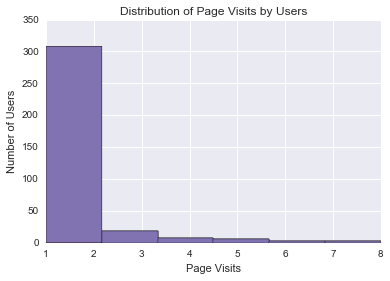

In [41]:
#Descriptive Stats
df_cluster4.groupby('UUID').count().sort(['URL']).plot(kind='hist', bins=6, legend=False,
                                                    title = 'Distribution of Page Visits by Users')
plt.xlabel('Page Visits')
plt.ylabel('Number of Users')

In [42]:
df_cluster4.groupby('UUID').count().mean()['URL'] #average number of page views for each student in this group

1.5203488372093024

In [43]:
#Time Series
df_cluster4['date'] = pd.to_datetime(df_cluster4['TimeStamp'])
df_cluster4.index = df_cluster4['date']
del df_cluster4['date']
del df_cluster4['TimeStamp']

In [44]:
df_cluster4 = df_cluster4.sort()
df_cluster4.head()

/Users/andycho/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  if __name__ == '__main__':


,URL,User Agent,UUID,ClassID
date,,,,
2014-09-04 17:28:49,/api/v1/courses/166/pages/virtual-sites/revisi...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_5)...,2d191768a201f89ac7f3bd38e73e3b1e,05d0532840f04928dfdd86296c51189d
2014-09-07 21:25:29,/api/v1/courses/166/pages/virtual-sites/revisi...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,64eb5b31b413bb831636eca94d385fba,05d0532840f04928dfdd86296c51189d
2014-09-08 04:41:43,/api/v1/courses/166/pages/virtual-sites/revisi...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,c7422696709c1c95d5e9467c6dcf0011,05d0532840f04928dfdd86296c51189d
2014-09-08 07:22:23,/api/v1/courses/166/pages/virtual-sites/revisi...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,a83c57755761edd1ea010a374cd5f090,05d0532840f04928dfdd86296c51189d
2014-09-08 15:04:46,/api/v1/courses/166/pages/virtual-sites/revisi...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3)...,e7206aa8d573d2814cc8a43b14e08c12,05d0532840f04928dfdd86296c51189d


In [45]:
#bin them into days or something and then use the count to see how many are in a certain day or hour
df_cluster4['HofD'] = [r.hour for r in df_cluster4.index]
df_cluster4['DofM'] = [r.day for r in df_cluster4.index]
df_cluster4.head()

,URL,User Agent,UUID,ClassID,HofD,DofM
date,,,,,,
2014-09-04 17:28:49,/api/v1/courses/166/pages/virtual-sites/revisi...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_5)...,2d191768a201f89ac7f3bd38e73e3b1e,05d0532840f04928dfdd86296c51189d,17,4
2014-09-07 21:25:29,/api/v1/courses/166/pages/virtual-sites/revisi...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,64eb5b31b413bb831636eca94d385fba,05d0532840f04928dfdd86296c51189d,21,7
2014-09-08 04:41:43,/api/v1/courses/166/pages/virtual-sites/revisi...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,c7422696709c1c95d5e9467c6dcf0011,05d0532840f04928dfdd86296c51189d,4,8
2014-09-08 07:22:23,/api/v1/courses/166/pages/virtual-sites/revisi...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,a83c57755761edd1ea010a374cd5f090,05d0532840f04928dfdd86296c51189d,7,8
2014-09-08 15:04:46,/api/v1/courses/166/pages/virtual-sites/revisi...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3)...,e7206aa8d573d2814cc8a43b14e08c12,05d0532840f04928dfdd86296c51189d,15,8


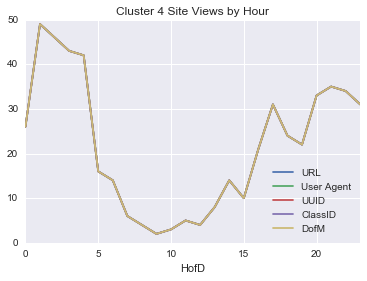

In [46]:
df_cluster4.groupby('HofD').count().plot(title='Cluster 4 Site Views by Hour')

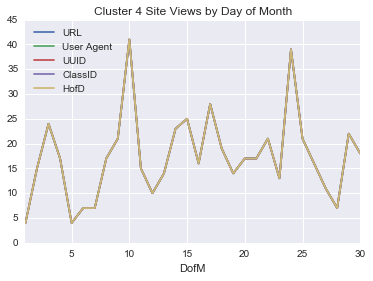

In [47]:
df_cluster4.groupby('DofM').count().plot(title='Cluster 4 Site Views by Day of Month')

In [48]:
#######CLUSTER 5 ANALYSIS
df_cluster5 = pd.DataFrame(columns=('URL', 'User Agent', 'TimeStamp', 'UUID', 'ClassID'))
for member in cluster5:
    df_cluster5.loc[len(df_cluster5)] = df_reduced.ix[member]
df_cluster5.head()

,URL,User Agent,TimeStamp,UUID,ClassID
0,/api/v1/courses/158/ping,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,2014-10-07 03:59:14,23086034542c094c805b27462ac051b0,08acd1cae6c97712fc8dbe400c35b47d
1,/api/v1/courses/158/ping,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,2014-11-10 12:52:51,2ad3dc8ad09204737e62d5979287c163,08acd1cae6c97712fc8dbe400c35b47d
2,/api/v1/courses/158/ping,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,2014-09-17 16:52:59,5e958d1919dd7753635406851709fbff,08acd1cae6c97712fc8dbe400c35b47d
3,/api/v1/courses/158/ping,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,2014-09-11 18:13:53,88302671e242336be7f9f10fb32b0d8e,08acd1cae6c97712fc8dbe400c35b47d
4,/api/v1/courses/158/ping,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,2014-10-09 12:22:03,418127ed04ba38547760fc1ca1c4e357,08acd1cae6c97712fc8dbe400c35b47d


/Users/andycho/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


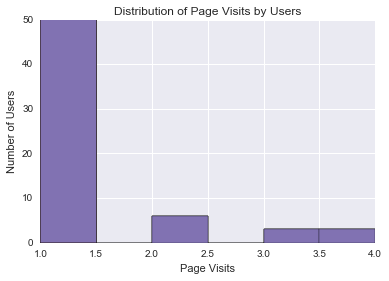

In [49]:
#Descriptive Stats
df_cluster5.groupby('UUID').count().sort(['URL']).plot(kind='hist', bins=6, legend=False,
                                                    title = 'Distribution of Page Visits by Users')
plt.xlabel('Page Visits')
plt.ylabel('Number of Users')

In [50]:
df_cluster5.groupby('UUID').count().mean()['URL'] #average number of page views for each student in this group

1.3387096774193548

In [51]:
#Time Series
df_cluster5['date'] = pd.to_datetime(df_cluster5['TimeStamp'])
df_cluster5.index = df_cluster5['date']
del df_cluster5['date']
del df_cluster5['TimeStamp']

In [52]:
df_cluster5 = df_cluster5.sort()
df_cluster5.head()

/Users/andycho/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  if __name__ == '__main__':


,URL,User Agent,UUID,ClassID
date,,,,
2014-09-02 16:48:42,/api/v1/courses/158/ping,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,3e8080b3d0e5c7b7d3e88a8fcc1a7aeb,08acd1cae6c97712fc8dbe400c35b47d
2014-09-03 01:18:29,/api/v1/courses/158/ping,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3)...,4e10015ea8d8b73570677cf5a14c8f73,08acd1cae6c97712fc8dbe400c35b47d
2014-09-05 17:38:19,/api/v1/courses/158/ping,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,d85bd79aba765954f4955c68990331f0,08acd1cae6c97712fc8dbe400c35b47d
2014-09-09 21:44:23,/api/v1/courses/158/ping,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,dfa66799d71320bfc5853ee1f0cea49f,08acd1cae6c97712fc8dbe400c35b47d
2014-09-10 04:18:28,/api/v1/courses/158/ping,Mozilla/5.0 (Macintosh; Intel Mac OS X 10.9; r...,9c3c35198762749e2ec6abb8a3ea001f,08acd1cae6c97712fc8dbe400c35b47d


In [53]:
#bin them into days or something and then use the count to see how many are in a certain day or hour
df_cluster5['HofD'] = [r.hour for r in df_cluster5.index]
df_cluster5['DofM'] = [r.day for r in df_cluster5.index]
df_cluster5.head()

,URL,User Agent,UUID,ClassID,HofD,DofM
date,,,,,,
2014-09-02 16:48:42,/api/v1/courses/158/ping,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,3e8080b3d0e5c7b7d3e88a8fcc1a7aeb,08acd1cae6c97712fc8dbe400c35b47d,16,2
2014-09-03 01:18:29,/api/v1/courses/158/ping,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3)...,4e10015ea8d8b73570677cf5a14c8f73,08acd1cae6c97712fc8dbe400c35b47d,1,3
2014-09-05 17:38:19,/api/v1/courses/158/ping,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,d85bd79aba765954f4955c68990331f0,08acd1cae6c97712fc8dbe400c35b47d,17,5
2014-09-09 21:44:23,/api/v1/courses/158/ping,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,dfa66799d71320bfc5853ee1f0cea49f,08acd1cae6c97712fc8dbe400c35b47d,21,9
2014-09-10 04:18:28,/api/v1/courses/158/ping,Mozilla/5.0 (Macintosh; Intel Mac OS X 10.9; r...,9c3c35198762749e2ec6abb8a3ea001f,08acd1cae6c97712fc8dbe400c35b47d,4,10


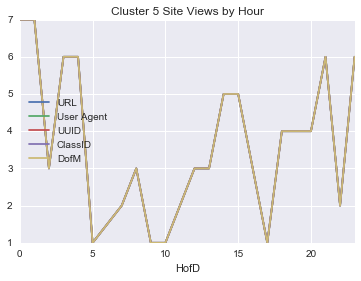

In [54]:
df_cluster5.groupby('HofD').count().plot(title='Cluster 5 Site Views by Hour')

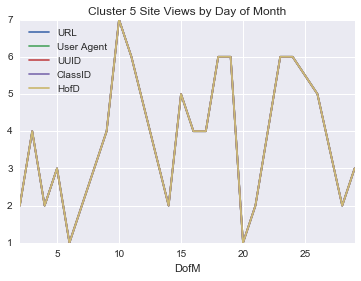

In [55]:
df_cluster5.groupby('DofM').count().plot(title='Cluster 5 Site Views by Day of Month')

In [61]:
#######CLUSTER 6 ANALYSIS
df_cluster6 = pd.DataFrame(columns=('URL', 'User Agent', 'TimeStamp', 'UUID', 'ClassID'))
for member in cluster6:
    df_cluster6.loc[len(df_cluster6)] = df_reduced.ix[member]
df_cluster6.head()

,URL,User Agent,TimeStamp,UUID,ClassID
0,/api/v1/courses/166/ping,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,2014-09-16 16:44:26,199225151486e66b50eddfd52a4dede1,05d0532840f04928dfdd86296c51189d
1,/api/v1/courses/166/ping,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,2014-10-15 00:56:09,9776df708e036c7a4e02500dbc460034,05d0532840f04928dfdd86296c51189d
2,/api/v1/courses/166/ping,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_5)...,2014-12-03 14:03:57,6508697e7260a5e087c6109a54c64443,05d0532840f04928dfdd86296c51189d
3,/api/v1/courses/166/ping,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,2014-11-18 14:44:47,b93752c3d851614af0f384d4d0179dee,05d0532840f04928dfdd86296c51189d
4,/api/v1/courses/166/ping,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_5)...,2014-11-05 14:16:47,4d83449dc00c71b159897baeac708b34,05d0532840f04928dfdd86296c51189d


/Users/andycho/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


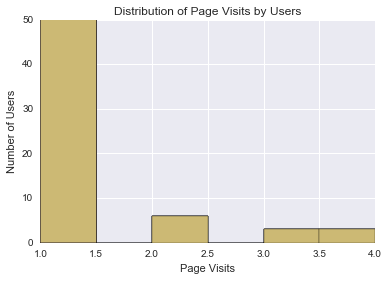

In [62]:
#Descriptive Stats
df_cluster5.groupby('UUID').count().sort(['URL']).plot(kind='hist', bins=6, legend=False,
                                                    title = 'Distribution of Page Visits by Users')
plt.xlabel('Page Visits')
plt.ylabel('Number of Users')

In [63]:
df_cluster6.groupby('UUID').count().mean()['URL'] #average number of page views for each student in this group

1.3387096774193548

In [65]:
#Time Series
df_cluster6['date'] = pd.to_datetime(df_cluster6['TimeStamp'])
df_cluster6.index = df_cluster6['date']
del df_cluster6['date']
del df_cluster6['TimeStamp']

In [66]:
df_cluster6 = df_cluster6.sort()
df_cluster6.head()

/Users/andycho/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  if __name__ == '__main__':


,URL,User Agent,UUID,ClassID
date,,,,
2014-08-28 15:33:32,/api/v1/courses/166/ping,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,e07fc7b544792eb611408f89f9923d24,05d0532840f04928dfdd86296c51189d
2014-08-31 18:36:24,/api/v1/courses/166/ping,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,5bb9defa1b3288ff20d24d19fdd2beb8,05d0532840f04928dfdd86296c51189d
2014-09-02 13:55:39,/api/v1/courses/166/ping,Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKi...,f0203543987311316eeccd8b67d3c02f,05d0532840f04928dfdd86296c51189d
2014-09-03 03:11:46,/api/v1/courses/166/ping,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,c426d779bb112d8aaf1a5c7c882fe7b7,05d0532840f04928dfdd86296c51189d
2014-09-03 16:04:24,/api/v1/courses/166/ping,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,a366ea47f4c633fc9810a6ca2dec729b,05d0532840f04928dfdd86296c51189d


In [67]:
#bin them into days or something and then use the count to see how many are in a certain day or hour
df_cluster5['HofD'] = [r.hour for r in df_cluster5.index]
df_cluster5['DofM'] = [r.day for r in df_cluster5.index]
df_cluster5.head()

,URL,User Agent,UUID,ClassID,HofD,DofM
date,,,,,,
2014-09-02 16:48:42,/api/v1/courses/158/ping,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,3e8080b3d0e5c7b7d3e88a8fcc1a7aeb,08acd1cae6c97712fc8dbe400c35b47d,16,2
2014-09-03 01:18:29,/api/v1/courses/158/ping,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3)...,4e10015ea8d8b73570677cf5a14c8f73,08acd1cae6c97712fc8dbe400c35b47d,1,3
2014-09-05 17:38:19,/api/v1/courses/158/ping,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,d85bd79aba765954f4955c68990331f0,08acd1cae6c97712fc8dbe400c35b47d,17,5
2014-09-09 21:44:23,/api/v1/courses/158/ping,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,dfa66799d71320bfc5853ee1f0cea49f,08acd1cae6c97712fc8dbe400c35b47d,21,9
2014-09-10 04:18:28,/api/v1/courses/158/ping,Mozilla/5.0 (Macintosh; Intel Mac OS X 10.9; r...,9c3c35198762749e2ec6abb8a3ea001f,08acd1cae6c97712fc8dbe400c35b47d,4,10
